In [7]:
import pandas as pd
import numpy as np
from pandas import read_excel
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from calendar import day_abbr, month_abbr, mdays
import datetime
#from datetime import datetime

from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots

from dateutil.easter import easter
import os

#from holidays import WEEKEND, HolidayBase
#from dateutil.easter import easter
#from dateutil.relativedelta import relativedelta as rd


#Author: Vatsala

#### Specify Image path

In [8]:
plot_file_path="../plotImages/"

#### Specify Plot ID 

In [12]:
plotID = "1"

### Create directory for particular plot

In [13]:
path_image = "../plotImages/Plot"+str(plotId)+"/"

try:
    if not os.path.exists(path_image):     
         os.mkdir(path_image)
except OSError:
    print ("Creation of the directory %s failed" % path_image)
else:
    print ("Successfully created the directory %s " % path_image)

Successfully created the directory ../plotImages/Plot1/ 


In [14]:
#****** Running Visualisation for Plot 1 *******  Note: Data has been QC-ed

#read Plot 1 data
data = read_excel('../plotData/plotData_'+plotID+'.xlsx', sheet_name='Sheet1', index_col=13, parse_dates=[13])    

In [15]:
print(data.head(10))
data.dtypes

                     QC  Plot_ID  DailyRep treatment       Date   pv      ghg  \
DateTime                                                                        
2019-03-26 17:26:00   0        1         4        F0 2019-03-26  ***  N2O_dry   
2019-03-26 21:49:00   0        1         5        F0 2019-03-26  ***  N2O_dry   
2019-03-27 06:28:00   0        1         1        F0 2019-03-27  ***  N2O_dry   
2019-03-28 20:34:00   0        1         2        F0 2019-03-28    *  N2O_dry   
2019-03-30 02:43:00   0        1         0        F0 2019-03-30  ***  N2O_dry   
2019-03-30 15:27:00   0        1         2        F0 2019-03-30  ***  N2O_dry   
2019-03-30 19:51:00   0        1         3        F0 2019-03-30   **  N2O_dry   
2019-03-31 00:17:00   0        1         0        F0 2019-03-31  ***  N2O_dry   
2019-03-31 04:43:00   0        1         1        F0 2019-03-31  ***  N2O_dry   
2019-03-31 13:32:00   0        1         3        F0 2019-03-31  ***  N2O_dry   

                    unit   

QC                     int64
Plot_ID                int64
DailyRep               int64
treatment             object
Date          datetime64[ns]
pv                    object
ghg                   object
unit                  object
flux                 float64
r2                   float64
nrmse                float64
podpu                float64
epoch_time            object
dtype: object

In [16]:
#This dataframe will be used for running in the Prophet model
#Extract only datetime and flux from the series
dataframe = DataFrame()
#dataframe['DateTime'] = data['DateTime']
dataframe['Flux']     = data['flux']
dataframe['ghg']      = data['ghg']
print(dataframe.tail(10))

                          Flux      ghg
DateTime                               
2019-06-27 22:38:00   768.2786  CO2_dry
2019-06-28 02:56:00   550.3863  CO2_dry
2019-06-28 15:51:00   351.4631  CO2_dry
2019-06-28 20:09:00   867.6166  CO2_dry
2019-06-29 00:27:00  1160.3080  CO2_dry
2019-06-29 04:46:00   930.5471  CO2_dry
2019-06-29 13:22:00   412.6364  CO2_dry
2019-06-29 17:41:00   540.0715  CO2_dry
2019-06-29 21:59:00   953.3316  CO2_dry
2019-06-30 02:17:00   684.4827  CO2_dry


In [17]:
#Resampling the data on weekly frequency
# Resampling the time series data based on weekly frequency - 'W'

weekly_resampled_data = dataframe['Flux'].resample('W').mean() 

In [18]:
weekly_resampled_data

DateTime
2019-03-31     -6.284731
2019-04-07     -1.047649
2019-04-14    -17.841520
2019-04-21    -37.011888
2019-04-28     59.018756
2019-05-05     -5.162470
2019-05-12    -21.767803
2019-05-19     58.954428
2019-05-26    129.190353
2019-06-02     91.318808
2019-06-09    111.199292
2019-06-16    142.815505
2019-06-23    -38.814027
2019-06-30    305.594929
Freq: W-SUN, Name: Flux, dtype: float64

In [19]:
#Downsampling - every 3 hours observations per day
resample = dataframe.resample('W')
weekly_mean_flux = resample.mean()

weekly_mean_flux['Week'] = weekly_mean_flux.index
weekly_mean_flux

,Flux,Week
DateTime,,
2019-03-31,-6.284731,2019-03-31
2019-04-07,-1.047649,2019-04-07
2019-04-14,-17.841520,2019-04-14
2019-04-21,-37.011888,2019-04-21
2019-04-28,59.018756,2019-04-28
2019-05-05,-5.162470,2019-05-05
2019-05-12,-21.767803,2019-05-12
2019-05-19,58.954428,2019-05-19
2019-05-26,129.190353,2019-05-26


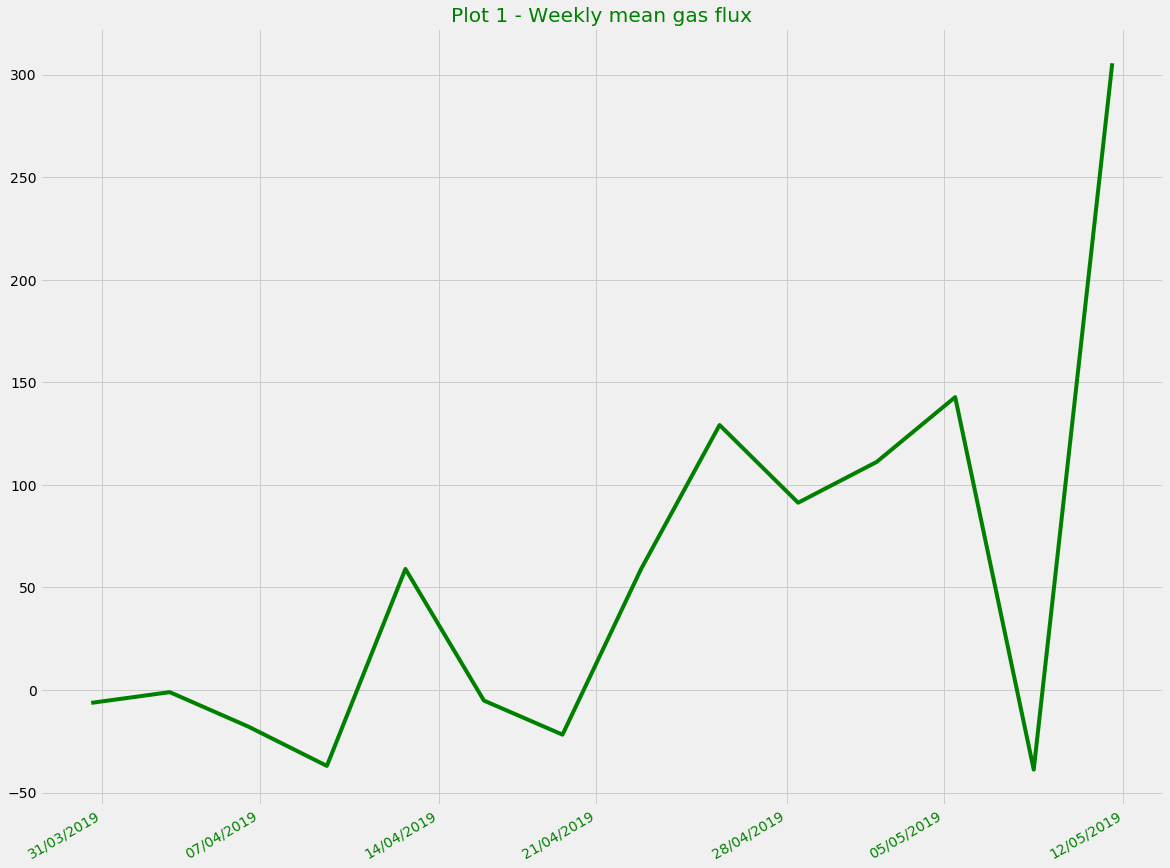

In [20]:
#Plot the weekly frequency

#Plot the figures VERTICALLY

plt.rcParams["figure.figsize"] = (20, 15)
fig, ax = plt.subplots(1)
#fig.suptitle('Plot 1 - Weekly mean greenhouse gas flux', color = 'green')
fig.tight_layout(pad=10.0)

#plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
#plt.xticks(rotation=30, ha='right', color = 'purple')     #- Note: this code will work only for the last chart

ax.plot(weekly_mean_flux['Week'], weekly_mean_flux['Flux'], color = 'green')  #, edgecolor = 'darkblue'
ax.set_title('Plot '+plotId+' - Weekly mean gas flux', color = 'green')
ax.set_xticklabels(weekly_mean_flux['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'green')


#Save boxplot as a file
#output file name
output_file_name = "Plot1/gasflux_Plot"+plotId+"_lineplot_weeklyFreq_meanallgases.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

In [21]:
#Divide the dataframe in the 3 gases measured

#1. Use Boolean Indexing to divide the dataframe as per the gases found
#N2O_dry, CH4_dry, CO2_dry
dataframe_N2Odry = dataframe[dataframe['ghg'] == "N2O_dry"]

dataframe_CH4dry = dataframe[dataframe['ghg'] == "CH4_dry"]

dataframe_CO2dry = dataframe[dataframe['ghg'] == "CO2_dry"]
dataframe_CH4dry


,Flux,ghg
DateTime,,
2019-03-26 17:26:00,-98.0130,CH4_dry
2019-03-26 21:49:00,-25.5522,CH4_dry
2019-03-27 06:28:00,-54.1259,CH4_dry
2019-03-30 02:43:00,940.7205,CH4_dry
2019-03-30 15:27:00,-59.4622,CH4_dry
...,...,...
2019-06-29 04:46:00,5148.4019,CH4_dry
2019-06-29 13:22:00,-114.9512,CH4_dry
2019-06-29 17:41:00,-74.6339,CH4_dry


In [22]:
#Resample weekly frequency for each of the gases 

#N2O dry
resample_N2Odry             = dataframe_N2Odry.resample('W')
weekly_mean_flux_N2O        = resample_N2Odry.mean()
weekly_mean_flux_N2O['Week']= weekly_mean_flux_N2O.index

#CH4 dry
resample_CH4dry             = dataframe_CH4dry.resample('W')
weekly_mean_flux_CH4        = resample_CH4dry.mean()
weekly_mean_flux_CH4['Week']= weekly_mean_flux_CH4.index

#CO2 dry
resample_CO2dry             = dataframe_CO2dry.resample('W')
weekly_mean_flux_CO2        = resample_CO2dry.mean()
weekly_mean_flux_CO2['Week']= weekly_mean_flux_CO2.index

#weekly_mean_flux_N2O
#weekly_mean_flux_CH4
weekly_mean_flux_CO2

,Flux,Week
DateTime,,
2019-03-31,-21.603482,2019-03-31
2019-04-07,10.436290,2019-04-07
2019-04-14,-79.815207,2019-04-14
2019-04-21,-110.697019,2019-04-21
2019-04-28,337.307597,2019-04-28
2019-05-05,24.862274,2019-05-05
2019-05-12,-54.232025,2019-05-12
2019-05-19,196.377275,2019-05-19
2019-05-26,423.432460,2019-05-26


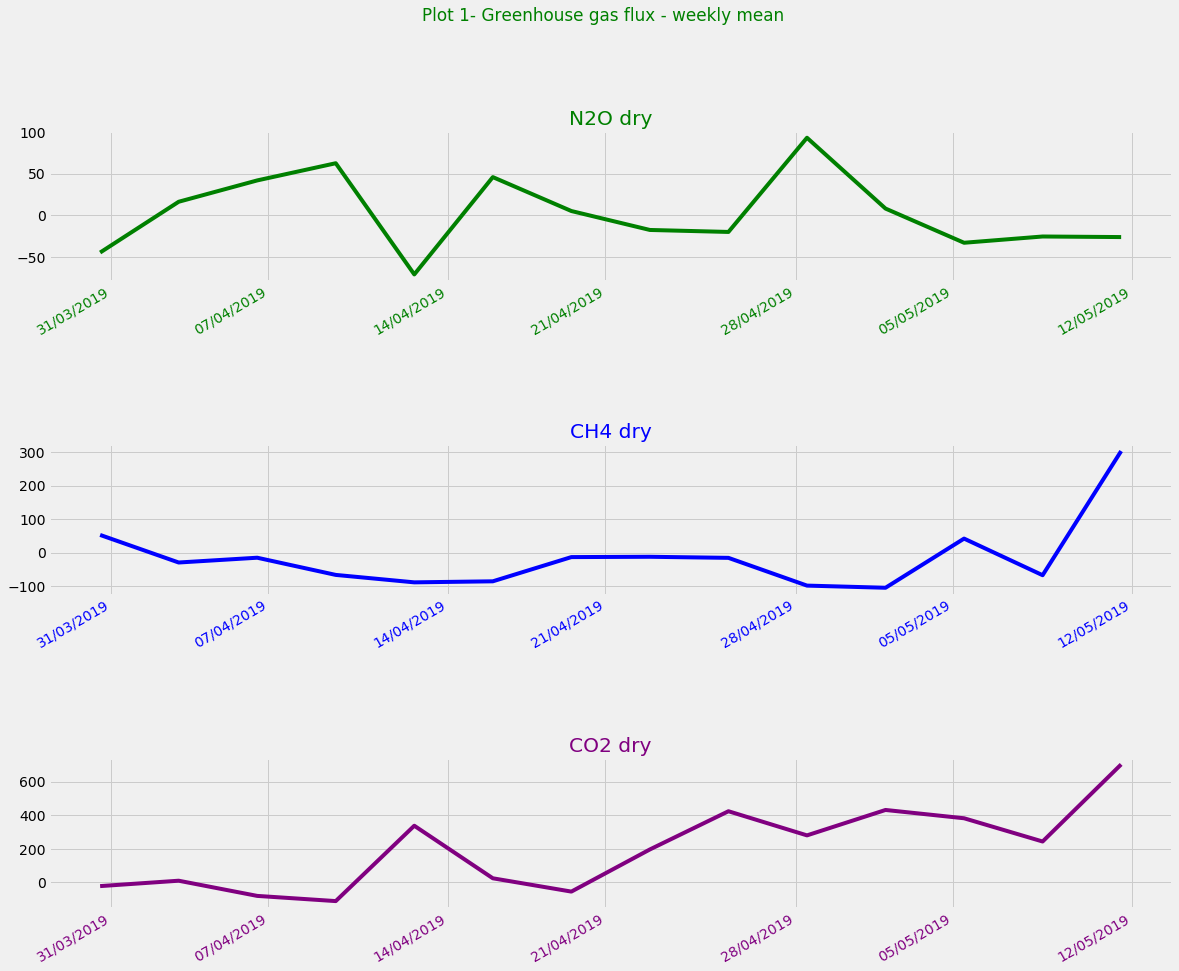

In [23]:
#Plot the figures VERTICALLY

plt.rcParams["figure.figsize"] = (20, 15)
fig, axs = plt.subplots(3)
fig.suptitle('Plot '+plotId+'- Greenhouse gas flux - weekly mean', color = 'green')
fig.tight_layout(pad=10.0)

axs[0].plot(weekly_mean_flux_N2O.index, weekly_mean_flux_N2O['Flux'], color = 'green')  #, edgecolor = 'darkblue'
axs[0].set_title('N2O dry', color = 'green')
axs[0].set_xticklabels(weekly_mean_flux_N2O['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'green')

axs[1].plot(weekly_mean_flux_CH4.index, weekly_mean_flux_CH4['Flux'],  color = 'blue')
axs[1].set_title('CH4 dry', color = 'blue')
axs[1].set_xticklabels(weekly_mean_flux_CH4['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'blue')

axs[2].plot(weekly_mean_flux_CO2.index, weekly_mean_flux_CO2['Flux'],  color = 'purple')
axs[2].set_title('CO2 dry', color = 'purple')
axs[2].set_xticklabels(weekly_mean_flux_CO2['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'purple')

#Save boxplot as a file
#output file name
output_file_name = "Plot1/gasflux_Plot"+plotId+"_lineplot_weeklyFreq_meanseparategases.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

In [24]:
weekly_mean_flux_N2O

,Flux,Week
DateTime,,
2019-03-31,-44.579073,2019-03-31
2019-04-07,16.343638,2019-04-07
2019-04-14,41.949904,2019-04-14
2019-04-21,62.582169,2019-04-21
2019-04-28,-70.851017,2019-04-28
2019-05-05,45.934541,2019-05-05
2019-05-12,5.229482,2019-05-12
2019-05-19,-17.500360,2019-05-19
2019-05-26,-19.869320,2019-05-26


In [25]:
#Find the maximum, minimum and mean gas flux per for N2O - weekly

resample_N2Odry_3features              = dataframe_N2Odry.resample('W')
weekly_mean_flux_N2O_3features         = resample_N2Odry_3features.agg({'Flux': ['mean', 'min', 'max']})
weekly_mean_flux_N2O_3features['Week'] = weekly_mean_flux_N2O_3features.index
# OR we can do this --> weekly_mean_flux_N2O1        = resample_N2Odry1.min()
weekly_mean_flux_N2O_3features.columns = ['Flux_mean', 'Flux_min', 'Flux_max', 'Week']

weekly_mean_flux_N2O_3features

,Flux_mean,Flux_min,Flux_max,Week
DateTime,,,,
2019-03-31,-44.579073,-157.9453,280.6187,2019-03-31
2019-04-07,16.343638,-172.2738,198.6105,2019-04-07
2019-04-14,41.949904,-272.8050,265.9149,2019-04-14
2019-04-21,62.582169,-333.9403,415.1940,2019-04-21
2019-04-28,-70.851017,-388.2456,401.7966,2019-04-28
2019-05-05,45.934541,-357.1389,315.9975,2019-05-05
2019-05-12,5.229482,-351.6477,297.5582,2019-05-12
2019-05-19,-17.500360,-332.9699,327.4924,2019-05-19
2019-05-26,-19.869320,-382.0324,286.9214,2019-05-26


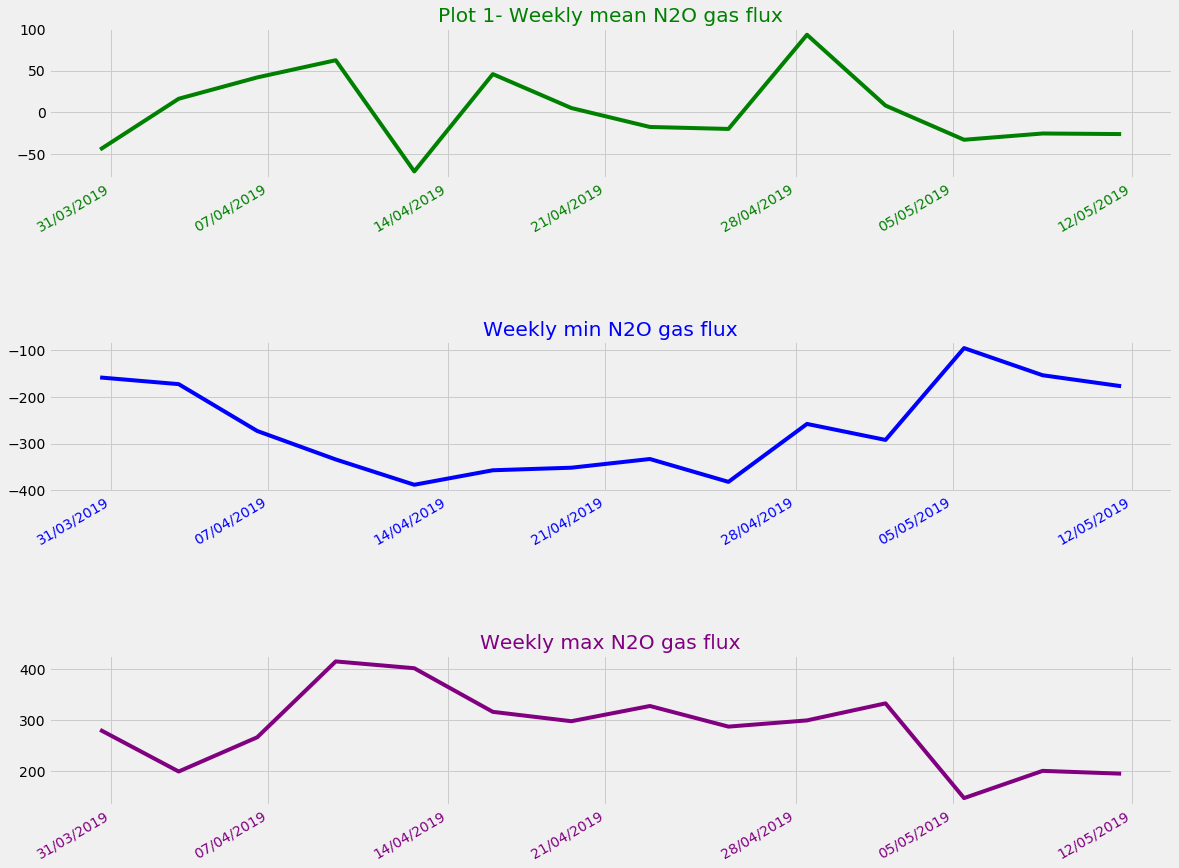

In [26]:
#Plot the weekly frequency for NO2 dry - mean, min and max

#Plot the figures VERTICALLY

plt.rcParams["figure.figsize"] = (20, 15)
fig, axs = plt.subplots(3)
#fig.suptitle('Weekly mean greenhouse gas flux', color = 'green')
fig.tight_layout(pad=10.0)

#plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
#plt.xticks(rotation=30, ha='right', color = 'purple')     #- Note: this code will work only for the last chart

axs[0].plot(weekly_mean_flux_N2O_3features['Week'], weekly_mean_flux_N2O_3features['Flux_mean'], color = 'green')  #, edgecolor = 'darkblue'
axs[0].set_title('Plot '+plotId+'- Weekly mean N2O gas flux', color = 'green')
axs[0].set_xticklabels(weekly_mean_flux_N2O_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'green')

axs[1].plot(weekly_mean_flux_N2O_3features['Week'], weekly_mean_flux_N2O_3features['Flux_min'], color = 'blue')  #, edgecolor = 'darkblue'
axs[1].set_title('Weekly min N2O gas flux', color = 'blue')
axs[1].set_xticklabels(weekly_mean_flux_N2O_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'blue')

axs[2].plot(weekly_mean_flux_N2O_3features['Week'], weekly_mean_flux_N2O_3features['Flux_max'], color = 'purple')  #, edgecolor = 'darkblue'
axs[2].set_title('Weekly max N2O gas flux', color = 'purple')
axs[2].set_xticklabels(weekly_mean_flux_N2O_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'purple')

#Save boxplot as a file
#output file name
output_file_name = "Plot1/gasflux_Plot"+plotId+"_lineplot_weeklyFreq_meanminmaxN2O.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

In [27]:
#Find the maximum, minimum and mean gas flux per for CH4 - weekly

resample_CH4dry_3features              = dataframe_CH4dry.resample('W')
weekly_mean_flux_CH4_3features         = resample_CH4dry_3features.agg({'Flux': ['mean', 'min', 'max']})
weekly_mean_flux_CH4_3features['Week'] = weekly_mean_flux_CH4_3features.index

weekly_mean_flux_CH4_3features.columns = ['Flux_mean', 'Flux_min', 'Flux_max', 'Week']

weekly_mean_flux_CH4_3features

,Flux_mean,Flux_min,Flux_max,Week
DateTime,,,,
2019-03-31,52.689670,-98.0130,940.7205,2019-03-31
2019-04-07,-29.922876,-123.7815,183.0084,2019-04-07
2019-04-14,-15.578433,-145.0403,466.6160,2019-04-14
2019-04-21,-67.099674,-455.4975,267.9729,2019-04-21
2019-04-28,-89.400310,-297.0784,104.3976,2019-04-28
2019-05-05,-86.284226,-613.8875,341.8726,2019-05-05
2019-05-12,-13.711263,-263.4741,196.4380,2019-05-12
2019-05-19,-12.772700,-193.6229,401.6919,2019-05-19
2019-05-26,-15.992080,-216.9256,480.0219,2019-05-26


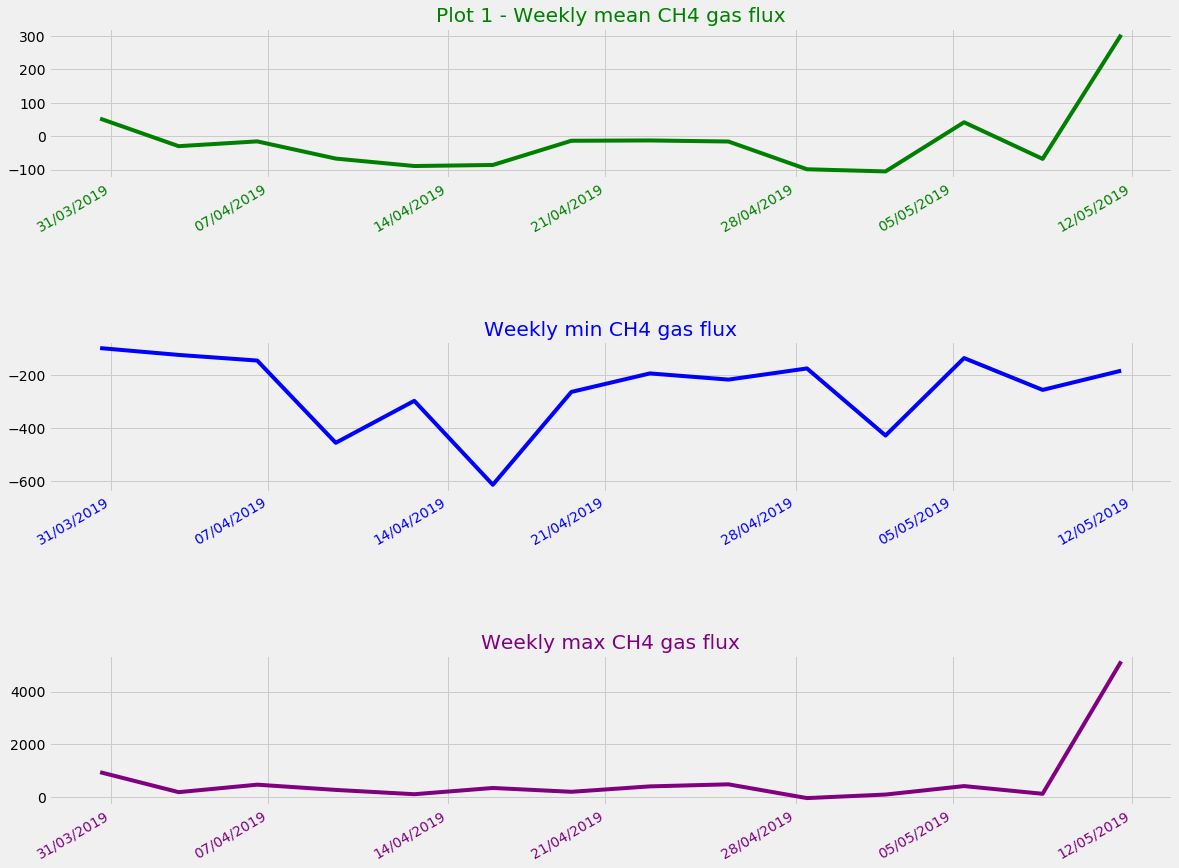

In [28]:
#Plot the weekly frequency for CH4 dry - mean, min and max

#Plot the figures VERTICALLY

plt.rcParams["figure.figsize"] = (20, 15)
fig, axs = plt.subplots(3)
#fig.suptitle('Weekly mean greenhouse gas flux', color = 'green')
fig.tight_layout(pad=10.0)

#plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
#plt.xticks(rotation=30, ha='right', color = 'purple')     #- Note: this code will work only for the last chart

axs[0].plot(weekly_mean_flux_CH4_3features['Week'], weekly_mean_flux_CH4_3features['Flux_mean'], color = 'green')  #, edgecolor = 'darkblue'
axs[0].set_title('Plot '+plotId+' - Weekly mean CH4 gas flux', color = 'green')
axs[0].set_xticklabels(weekly_mean_flux_CH4_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'green')

axs[1].plot(weekly_mean_flux_CH4_3features['Week'], weekly_mean_flux_CH4_3features['Flux_min'], color = 'blue')  #, edgecolor = 'darkblue'
axs[1].set_title('Weekly min CH4 gas flux', color = 'blue')
axs[1].set_xticklabels(weekly_mean_flux_CH4_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'blue')

axs[2].plot(weekly_mean_flux_CH4_3features['Week'], weekly_mean_flux_CH4_3features['Flux_max'], color = 'purple')  #, edgecolor = 'darkblue'
axs[2].set_title('Weekly max CH4 gas flux', color = 'purple')
axs[2].set_xticklabels(weekly_mean_flux_CH4_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'purple')

#Save boxplot as a file
#output file name
output_file_name = "Plot1/gasflux_Plot"+plotId+"_lineplot_weeklyFreq_meanminmaxCH4.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

In [29]:
#Find the maximum, minimum and mean gas flux per for CO2 - weekly

resample_CO2dry_3features              = dataframe_CO2dry.resample('W')
weekly_mean_flux_CO2_3features         = resample_CO2dry_3features.agg({'Flux': ['mean', 'min', 'max']})
weekly_mean_flux_CO2_3features['Week'] = weekly_mean_flux_CO2_3features.index

weekly_mean_flux_CO2_3features.columns = ['Flux_mean', 'Flux_min', 'Flux_max', 'Week']

weekly_mean_flux_CO2_3features

,Flux_mean,Flux_min,Flux_max,Week
DateTime,,,,
2019-03-31,-21.603482,-1701.9439,925.9897,2019-03-31
2019-04-07,10.436290,-1447.0002,572.1158,2019-04-07
2019-04-14,-79.815207,-1753.8020,528.3161,2019-04-14
2019-04-21,-110.697019,-2266.3740,1086.8100,2019-04-21
2019-04-28,337.307597,-2170.1690,2055.6320,2019-04-28
2019-05-05,24.862274,-1836.9910,955.5110,2019-05-05
2019-05-12,-54.232025,-1374.0280,720.1447,2019-05-12
2019-05-19,196.377275,-1114.3080,915.4103,2019-05-19
2019-05-26,423.432460,-994.4530,1522.3350,2019-05-26


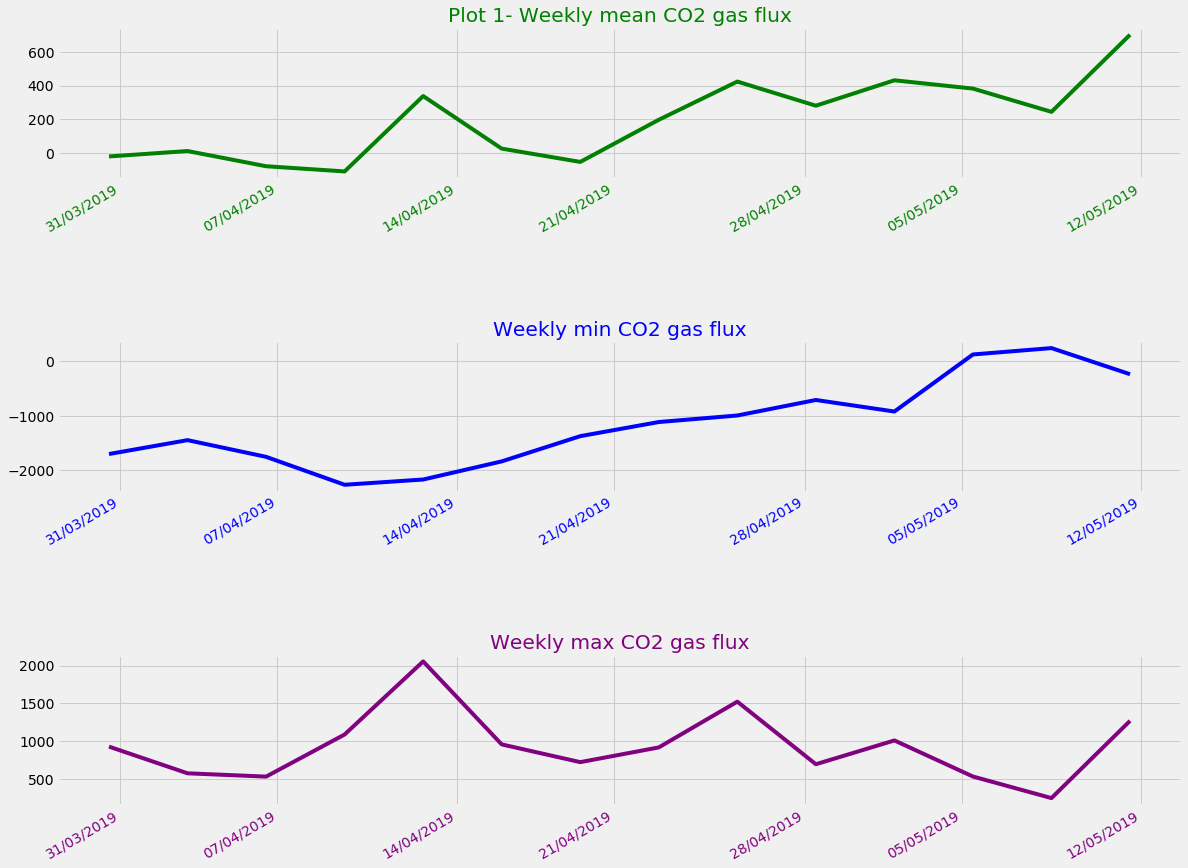

In [30]:
#Plot the weekly frequency for CO2 dry - mean, min and max

#Plot the figures VERTICALLY

plt.rcParams["figure.figsize"] = (20, 15)
fig, axs = plt.subplots(3)
#fig.suptitle('Weekly mean greenhouse gas flux', color = 'green')
fig.tight_layout(pad=10.0)

#plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
#plt.xticks(rotation=30, ha='right', color = 'purple')     #- Note: this code will work only for the last chart

axs[0].plot(weekly_mean_flux_CO2_3features['Week'], weekly_mean_flux_CO2_3features['Flux_mean'], color = 'green')  #, edgecolor = 'darkblue'
axs[0].set_title('Plot '+plotId+'- Weekly mean CO2 gas flux', color = 'green')
axs[0].set_xticklabels(weekly_mean_flux_CO2_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'green')

axs[1].plot(weekly_mean_flux_CO2_3features['Week'], weekly_mean_flux_CO2_3features['Flux_min'], color = 'blue')  #, edgecolor = 'darkblue'
axs[1].set_title('Weekly min CO2 gas flux', color = 'blue')
axs[1].set_xticklabels(weekly_mean_flux_CO2_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'blue')

axs[2].plot(weekly_mean_flux_CO2_3features['Week'], weekly_mean_flux_CO2_3features['Flux_max'], color = 'purple')  #, edgecolor = 'darkblue'
axs[2].set_title('Weekly max CO2 gas flux', color = 'purple')
axs[2].set_xticklabels(weekly_mean_flux_CO2_3features['Week'].apply(lambda x: x.strftime("%d/%m/%Y")), rotation=30, ha='right', color = 'purple')

#Save boxplot as a file
#output file name
output_file_name = "Plot1/gasflux_Plot"+plotId+"_lineplot_weeklyFreq_meanminmaxCO2.png" 
plot_file_name = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

In [31]:
#Plot mean for each separate gas together in one frame
#should be the same as cell 143

### Explore Plot data - mean flux per hour for each day of week

In [32]:
hour_week2 = dataframe.copy()
hour_week2.loc[:,'day_of_week'] = hour_week2.index.weekday_name
hour_week2.loc[:,'hour_per_day']= hour_week2.index.hour
print(hour_week2.head(5))

                         Flux      ghg day_of_week  hour_per_day
DateTime                                                        
2019-03-26 17:26:00 -144.0262  N2O_dry     Tuesday            17
2019-03-26 21:49:00 -102.3469  N2O_dry     Tuesday            21
2019-03-27 06:28:00  -93.0909  N2O_dry   Wednesday             6
2019-03-28 20:34:00   63.8219  N2O_dry    Thursday            20
2019-03-30 02:43:00 -157.9453  N2O_dry    Saturday             2


In [33]:
#Group by day of week and by hour - and calculate the mean flux
grouped_multiple = hour_week2.groupby(['day_of_week', 'hour_per_day']).agg({'Flux': ['mean', 'min', 'max']})
grouped_multiple.columns = ['flux_mean', 'flux_min', 'flux_max']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple.head(5))

  day_of_week  hour_per_day   flux_mean  flux_min  flux_max
0      Friday             0  149.599267 -175.0602  508.5739
1      Friday             1  154.108571  -94.8999  469.7041
2      Friday             2  188.301500 -178.9383  857.7275
3      Friday             3  158.331186 -153.1700  641.5220
4      Friday             4  196.136922 -233.3588  798.1198


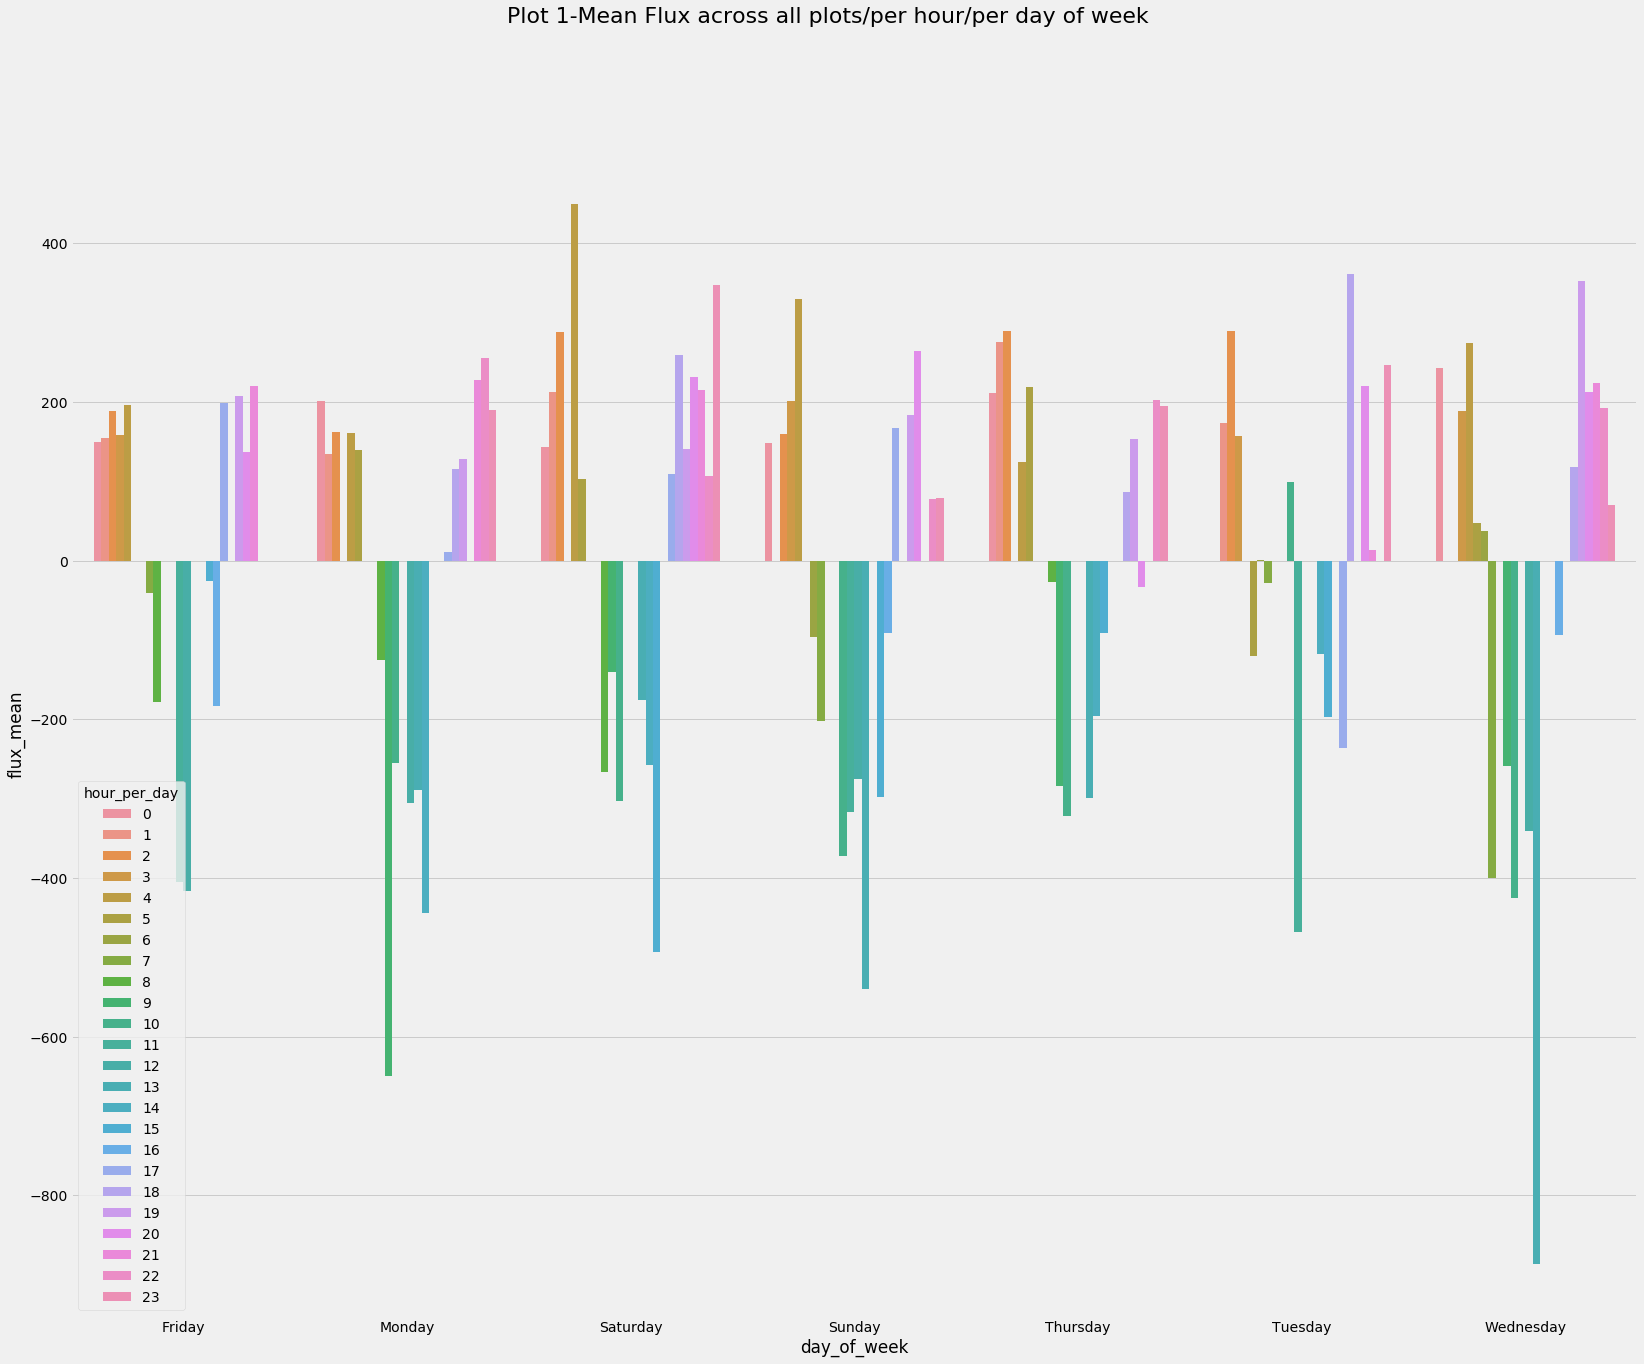

In [34]:
#Plot the flux mean for every hour for each day of week
g = sns.barplot(x='day_of_week', y='flux_mean', hue='hour_per_day', data=grouped_multiple, saturation=0.8)
g.figure.set_figwidth(25)
g.figure.set_figheight(20)
g.figure.suptitle("Plot "+plotId+"-Mean Flux across all plots/per hour/per day of week", fontsize=22)

#Save boxplot as a file
#output file name
output_file_name = "gasflux_Plot"+plotId+"_hourly_dayofweek_barplot.png" 
plot_file_name = path_image + output_file_name

# save as png
g.figure.savefig(plot_file_name)